In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout,GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils


from keras.preprocessing import image
import keras.backend as K
import cv2
import sys

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


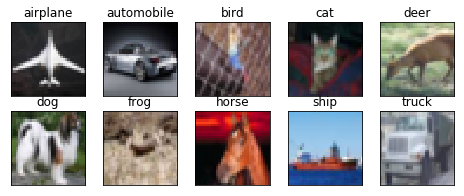

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()

# Conv Block1
model.add(Convolution2D(32, 3, 3, use_bias=False,name='layer1',border_mode='same', input_shape=(32, 32, 3)))  #3       32
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, use_bias=False,name='layer2',border_mode='same'))        #5             32
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(128, 3, 3, use_bias=False,name='layer3',border_mode='same'))         #7                      32
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Transition Block1
model.add(MaxPooling2D(pool_size=(2, 2)))                                                  #14             16
model.add(Convolution2D(32, 1, 1))


# Conv Block2
model.add(Convolution2D(64, 3, 3, use_bias=False,name='layer4',border_mode='same'))          #16          16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(128, 3, 3, use_bias=False,name='layer5',border_mode='same'))            #18       16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Transition Block2
model.add(MaxPooling2D(pool_size=(2, 2)))                                                       #36       8
model.add(Convolution2D(32, 1, 1))

# Conv Block3
model.add(Convolution2D(64, 3, 3, use_bias=False,name='layer6',border_mode='same'))               #38     8
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(128, 3, 3, use_bias=False,name='layer7',border_mode='same'))               #40     8
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Final Block3
model.add(Convolution2D(10, 1, 1))
model.add(Dropout(0.25))
model.add(GlobalAveragePooling2D())

#model.add(Flatten())

model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0701 17:39:46.480351 140418935904128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), use_bias=False, name="layer1", input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
W0701 17:39:46.516542 140418935904128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0701 17:39:46.522648 140418935904128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0701 17:39:46.555724 1404

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Conv2D)              (None, 32, 32, 32)        864       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
layer2 (Conv2D)              (None, 32, 32, 64)        18432     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
__________

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ModelCheckpoint

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

checkpoint = ModelCheckpoint('drive/My Drive/Colab Notebooks/EVA/Assignment 9/Weights/Assignment9.hdf5',monitor='acc',save_weights_only=False,save_best_only = True,mode='auto')
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1,callbacks=[checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<tensorfl..., steps_per_epoch=390, epochs=50)`
  del sys.path[0]


Epoch 1/50
390/390 [==============================] - 23s 60ms/step - loss: 1.2709 - acc: 0.5369 - val_loss: 1.5481 - val_acc: 0.4522
Epoch 2/50
390/390 [==============================] - 23s 60ms/step - loss: 0.9760 - acc: 0.6509 - val_loss: 1.2225 - val_acc: 0.5686
Epoch 3/50
390/390 [==============================] - 23s 60ms/step - loss: 0.8509 - acc: 0.7012 - val_loss: 1.3156 - val_acc: 0.5513
Epoch 4/50
390/390 [==============================] - 24s 60ms/step - loss: 0.7564 - acc: 0.7362 - val_loss: 1.3145 - val_acc: 0.5523
Epoch 5/50
390/390 [==============================] - 23s 60ms/step - loss: 0.6889 - acc: 0.7599 - val_loss: 1.0226 - val_acc: 0.6345
Epoch 6/50
390/390 [==============================] - 23s 60ms/step - loss: 0.6412 - acc: 0.7766 - val_loss: 1.0414 - val_acc: 0.6383
Epoch 7/50
390/390 [==============================] - 23s 60ms/step - loss: 0.6056 - acc: 0.7894 - val_loss: 1.0486 - val_acc: 0.6382
Epoch 8/50
390/390 [==============================] - 23s 60ms

KeyboardInterrupt: ignored

In [0]:
y_pred = model.predict_generator(datagen.flow(test_features, test_labels,shuffle=False, batch_size = 128),steps=len(test_features)/128)

y_pred_argmax = np.argmax(np.rint(y_pred), axis=1)

y_argmax = np.argmax(np.rint(test_labels), axis=1)
index= []

for x in range(y_pred_argmax.shape[0]):
  if y_pred_argmax[x] != y_argmax[x]:
    index.append(x)
    
print(len(index))

2347


In [0]:
def getHeatMapFromLayer(layer_name,image):
  x = np.expand_dims(image, axis=0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer(layer_name)
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(10):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  return heatmap

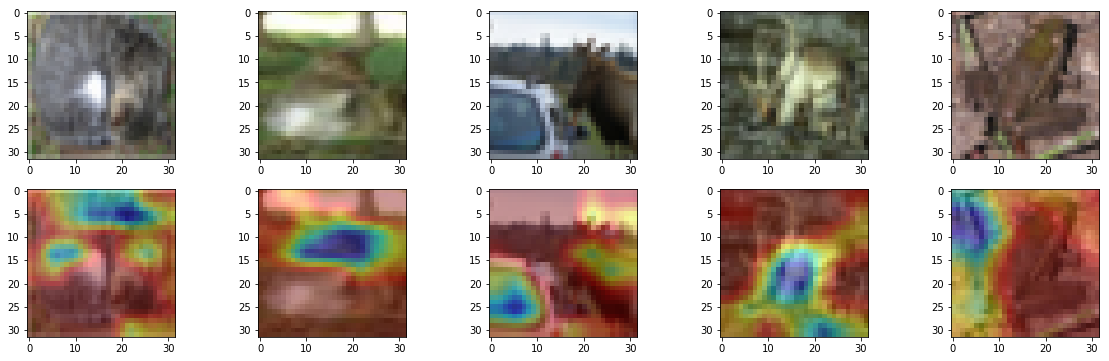

In [0]:
import random 

#fig,ax = plt.subplots(1,figsize = (8, 8))
fig, ax = plt.subplots(2, 5, figsize = (20,6))

for i in range(5):
  img = test_features[index[random.randint(0,len(index))]]*255
  heatmap = getHeatMapFromLayer('conv2d_3',img)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img.astype(float), 0.6, heatmap.astype(float), 0.4, 0)
  ax[0, i].imshow(img/255)
  ax[1, i].imshow(superimposed_img/255)
  
plt.show()